In [59]:
!pip install countryinfo
!pip install missingno
import pandas as pd
import numpy as np
import missingno as msno

import re
import math


from countryinfo import CountryInfo

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 16)

In [60]:
conda install opencv 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


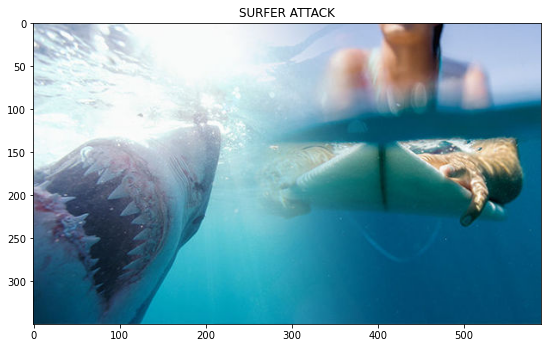

In [61]:
import cv2
binary = cv2.imread('Image1 surfer.jpg')
binary.shape
plt.figure(figsize=[20,20])
plt.imshow(binary[:,:,::-1])
plt.title("Surfer")
plt.subplot(122)
plt.imshow(binary[:,:,::-1])
plt.title("SURFER ATTACK")
plt.show()

In [62]:
db = pd.read_csv('attacks.csv', encoding='cp1252')
len(db)

25723

In [63]:
#First visualitation
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN


In [64]:
db.drop_duplicates()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#checking null data, how many empty cells there are in every column.
null_cols = db.isnull().sum()
null_cols

Case Number       17021
Date              19421
Year              19423
Type              19425
Country           19471
                  ...  
Case Number.1     19421
Case Number.2     19421
original order    19414
Unnamed: 22       25722
Unnamed: 23       25721
Length: 24, dtype: int64

In [66]:
len(db)
#No duplicates, len remains the same

25723

In [67]:
#show columns of db that have NaN values
def null_cols(db):
    nulls = db.isna().sum()
    return nulls[nulls > 0] / len(db) * 100
null_cols(db)

Case Number       66.170353
Date              75.500525
Year              75.508300
Type              75.516075
Country           75.694903
                    ...    
Case Number.1     75.500525
Case Number.2     75.500525
original order    75.473312
Unnamed: 22       99.996112
Unnamed: 23       99.992225
Length: 24, dtype: float64

In [68]:
#Delete blank spaces on the name of the columns
db.columns = db.columns.str.rstrip()

In [69]:
#Check if 'Case Number' contains the same info as "Case Number.1" & "Case Number.1"
(db[
    (db["Case Number"] == db["Case Number.1"])
    & 
    (db["Case Number"] == db["Case Number.2"])
].shape)

(6278, 24)

In [70]:
db.drop(columns = ["Case Number.1", "Case Number.2"], inplace = True)

In [71]:
#Unnamed: 22" and "Unnamed: 23" are mostly empty. Let's examine what they contain
db['Unnamed: 22'].fillna(0, inplace=True)
[x for x in db['Unnamed: 22'] if x!=0]

['stopped here']

In [72]:
#We will drop Unmamed:22, only contain 'stopped here'/ Unmamed:23, only contain 'Teramo' & 'change filename'

In [73]:
db['Unnamed: 23'].fillna(0, inplace=True)
[y for y in db['Unnamed: 23'] if y!=0]

['Teramo', 'change filename']

In [74]:
db.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace = True)

In [75]:
#Let's check how many different values contain this two columns in order to drop them
db[db["href formula"] != db["href"]][["href formula", "href"]].shape

(19481, 2)

In [76]:
# searching missing values in 'href formula' which is present in 'href':

db[(db["href formula"] != db["href"]) & (db["href formula"]).isna()]["href"]

#shark_attack.drop(columns = ["href"], inplace = True)

3244     http://sharkattackfile.net/spreadsheets/pdf_di...
6302                                                   NaN
6303                                                   NaN
6304                                                   NaN
6305                                                   NaN
                               ...                        
25718                                                  NaN
25719                                                  NaN
25720                                                  NaN
25721                                                  NaN
25722                                                  NaN
Name: href, Length: 19422, dtype: object

In [77]:
# Then assign this value to the dataset:
db.at[3244, 'href formula'] = db.loc[3244]["href"]
#checking everything it's correct now
db[(db["href formula"] != db["href"]) & (db["href formula"]).isna()]["href"]

6302     NaN
6303     NaN
6304     NaN
6305     NaN
6306     NaN
        ... 
25718    NaN
25719    NaN
25720    NaN
25721    NaN
25722    NaN
Name: href, Length: 19421, dtype: object

In [80]:
db.drop(columns = ["href"], inplace = True)

In [81]:
#‘all’ : If all values are NA, drop that row or column.
db = db.dropna(how='all')
len(db)
#db = db.dropna() dropea todo si algún valor es NaN

8703

In [82]:
db.reset_index(drop=True)
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0


Let's have a look to Age and Sex columns

In [83]:
print(db['Age'].dtypes)

object


In [84]:
#Delete blank spaces of the names
db['Age']= db['Age'].str.strip()

In [85]:
NaN_rows_Age=db["Age"].isna().sum()
print('NaN rows Age:')
print(NaN_rows_Age)
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)

NaN rows Age:
5232
5232


In [86]:
#print(pd.to_numeric(db['Age'], errors='coerce').isnull().value_counts())

Replace first wrong values/Age demographic rages:
Under 12 years old
12-17 years old
18-24 years old
25-34 years old
35-44 years old
45-54 years old
55-64 years old
65-74 years old
75 years or older

In [87]:
db['Age']=db['Age'].replace(['9 months', '9 or 10','8 or 10','Both 11','10 or 12',  '9 & 12', '18 months', '7 or 8',  '2½', '2 to 3 months','6½',], '0 - Under 12 years old')
db['Age']=db['Age'].replace(['12 or 13','teen','"young"','young',  '?    &   14', '12-17 years old','13 or 14', '13 or 18', '16 to 18', '17 & 16', 'Teen', 'Teens'], '1 - 12-17 years old' )
db['Age']=db['Age'].replace(['mid-20s','23 & 26', '17 & 35', '18 or 20', '18 to 22', '20?', '20s', '21 & ?'], '2 - 18-24 years old')
db['Age']=db['Age'].replace(['23 & 20','21 or 26','30 or 36','mid-30s','28 & 26', '30s', '30 & 32', '31 or 33', '32 & 30', '(adult)', 'adult','25 or 28', '25 to 35', '28 &26', '28, 23 & 30', ], '3 - 25-34 years old')
db['Age']=db['Age'].replace(['Ca. 33', '33 & 37', '33 or 37', '33 & 26', '40s'], '4 - 35-44 years old')
db['Age']=db['Age'].replace(['>50','"middle-age"','50s'], '5 - 45-54 years old')
db['Age']=db['Age'].replace(['60s', "60's"], '6 - 55-64 years old')
db['Age']=db['Age'].replace(['Elderly'], '8 - 75 years or older')
db['Age']=db['Age'].replace(['21, 34,24 & 35','36 & 23','36 & 26','? & 19', '7      &    31','34 & 19','37, 67, 35, 27,  ? & 27', '46 & 34','50 & 30'], 'Different ages')

In [88]:
db['Age'] = db['Age'].str.replace('X', 'U')
db['Age'] = db['Age'].str.replace('\xa0', 'U')
db['Age'] = db['Age'].str.replace('MAKE LINE GREEN', 'U')
db['Age'] = db['Age'].str.replace('F', 'U')
db['Age'] = db['Age'].str.replace('A.M.', 'U')
#db['Age'] = db['Age'].str.replace('NaN', 'U')

In [89]:
db['Age']=db['Age'].replace(['1','2','3','4','5','6','7','8','9','10','11'], '0 - Under 12 years old')
db['Age']=db['Age'].replace(['12','13','14','15','16','17'], '1 - 12-17 years old')
db['Age']=db['Age'].replace(['18','19','20','21','22','23','24'], '2 - 18-24 years old')
db['Age']=db['Age'].replace(['25','26','27','28','29','30','31','32','33','34'], '3 - 25-34 years old')
db['Age']=db['Age'].replace(['35','36','37','38','39','40','41','42','43','44'], '4 - 35-44 years old')
db['Age']=db['Age'].replace(['45','46','47','48','49','50','51','52','53','54'], '5 - 45-54 years old')
db['Age']=db['Age'].replace(['55','56','57','58','59','60','61','62','63','64'], '6 - 55-64 years old')
db['Age']=db['Age'].replace(['65','66','67','68','69','70','71','72','73','74'], '7 - 65-74 years old')
db['Age']=db['Age'].replace(['75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94'], '8 - 75 years or older')

In [90]:
Ages=db.groupby(['Age'])
Ages.ngroups
Ages_count=db.groupby(['Age']).count()
Ages_count

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
Age,,,,,,,,,,,,,,,,,,
,4,4,4,4,4,4,4,3,4,4,4,4,3,2,4,4,4,4
0 - Under 12 years old,219,219,219,219,218,213,212,203,217,216,219,195,137,121,219,219,219,219
1 - 12-17 years old,723,723,723,723,723,707,704,683,721,711,721,692,456,393,722,723,723,723
2 - 18-24 years old,870,870,870,870,865,840,825,835,867,860,867,820,611,553,870,870,870,870
3 - 25-34 years old,740,740,740,740,739,708,705,712,738,734,740,697,499,501,738,740,740,740
4 - 35-44 years old,452,452,451,451,450,431,428,443,452,450,452,414,327,293,450,452,452,452
5 - 45-54 years old,268,268,268,268,268,259,259,260,268,268,268,243,179,200,267,268,268,268
6 - 55-64 years old,127,127,127,127,127,125,120,125,125,125,127,121,101,85,127,127,127,127
7 - 65-74 years old,42,42,42,42,42,41,40,40,42,42,42,38,30,33,42,42,42,42


In [75]:
#db['Age'] = db['Age'].fillna('U')

In [91]:
#Print set of different values
set(db['Age'])

{'',
 '0 - Under 12 years old',
 '1 - 12-17 years old',
 '2 - 18-24 years old',
 '3 - 25-34 years old',
 '4 - 35-44 years old',
 '5 - 45-54 years old',
 '6 - 55-64 years old',
 '7 - 65-74 years old',
 '8 - 75 years or older',
 'Different ages',
 'U',
 nan}

In [78]:
#db.groupby('Age').sum() #

TypeError: 'value' must be an instance of str or bytes, not a float

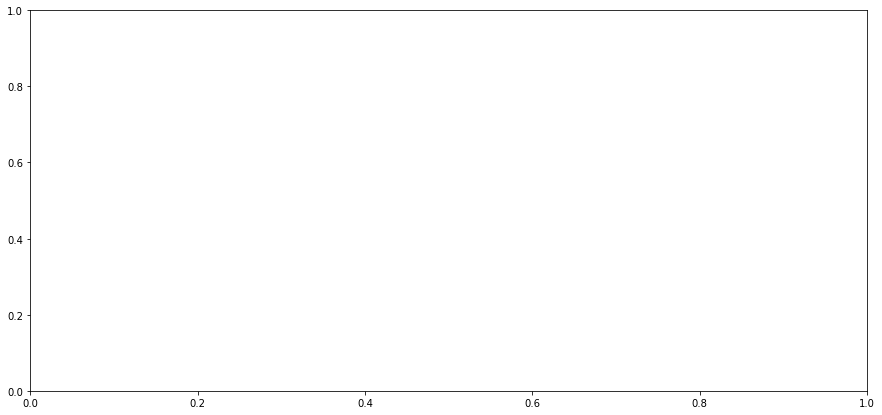

In [101]:
plt.figure(figsize=[15,7])
plt.hist(db['Age'])
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Sum',fontsize=15)
plt.grid(axis='y', alpha=0.75)

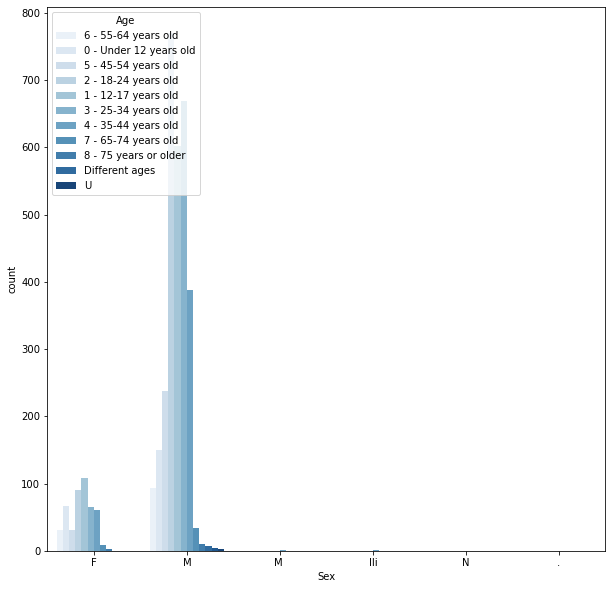

In [80]:
plt.figure(figsize=[10,10])
sns.countplot(x=db.Sex,
              hue=db.Age,
              palette="Blues")


In [81]:
null_rows_Sex = db['Sex'].isnull().sum()
print(null_rows_Sex)

2966


In [94]:
#Print set of different values
set(db['Sex'])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [95]:
db['Sex']= db['Sex'].str.strip()

In [96]:
set(db['Sex'])

{'.', 'F', 'M', 'N', 'lli', nan}

In [97]:
db['Sex']=db['Sex'].replace(['.', 'lli', 'N'], 'U')
#db['Sex'] = db['Sex'].fillna('U')

In [98]:
set(db['Sex'])

{'F', 'M', 'U', nan}

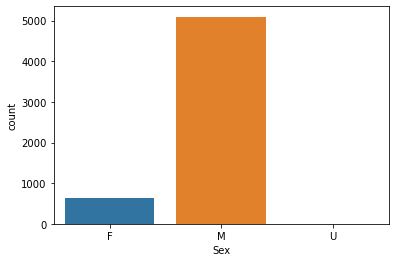

In [99]:
sns.countplot(x=db.Sex)

In [100]:
db[(db["Sex"] != db["Name"]) & (db["Sex"]).isna()]["Name"]

32               NaN
59       31 migrants
86               NaN
124              NaN
154              NaN
            ...     
8698             NaN
8699             NaN
8700             NaN
8701             NaN
25722            NaN
Name: Name, Length: 2966, dtype: object

In [89]:
set(db['Sex'])

{'F', 'M', 'U', nan}

In [90]:
db['Fatal (Y/N)']= db['Fatal (Y/N)'].str.strip()
set(db['Fatal (Y/N)'])

{'2017', 'M', 'N', 'UNKNOWN', 'Y', nan, 'y'}

In [91]:
db['Fatal (Y/N)'] = db['Fatal (Y/N)'].str.replace('y', 'Y')
db['Fatal (Y/N)']=db['Fatal (Y/N)'].replace(['2017','UNKNOWN','M'], 'U')
#db['Fatal (Y/N)'] = db['Fatal (Y/N)'].fillna('U')

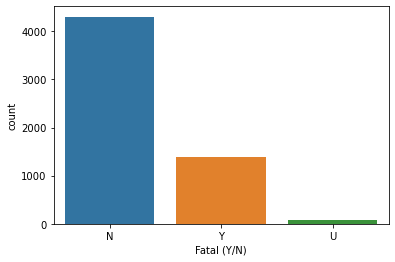

In [92]:
sns.countplot(x=db['Fatal (Y/N)'])

We should clarify more about the unknown

In [93]:
set(db['Type'])

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [94]:
db['Type'] = db['Type'].fillna('Not confirmed')
db['Type'] = db['Type'].str.replace('Boating', 'Boat')
db['Type'] = db['Type'].str.replace('Boatomg', 'Boat')
db['Type'] = db['Type'].str.replace('Invalid', 'Not confirmed')
db['Type'] = db['Type'].str.replace('Questionable', 'Not confirmed')

In [95]:
set(db['Type'])

{'Boat', 'Not confirmed', 'Provoked', 'Sea Disaster', 'Unprovoked'}

In [96]:
print(db['Country'].dtypes)

object


In [97]:
db['Country']= db['Country'].str.strip()

In [98]:
set(db['Country'])

{'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GABON',
 'GEORGIA'

In [99]:
db['Country']=db['Country'].replace(['Fiji'], 'FIJI')
db['Country']=db['Country'].replace(['RED SEA?','READ SEA / INDIAN OCEAN'], 'READ SEA')
db['Country']=db['Country'].replace(['ST. MAARTIN'], 'ST. MARTIN')
db['Country']=db['Country'].replace(['SUDAN?'], 'SUDAN')
db['Country']=db['Country'].replace(['UNITED ARAB EMIRATES (UAE)'], 'UNITED ARAB EMIRATES')
db['Country']=db['Country'].replace(['WESTERN SAMOA'], 'SAMOA')
db['Country']=db['Country'].replace(['TOBAGO'], 'TRINIDAD & TOBAGO')
db['Country']=db['Country'].replace(['SOLOMON ISLANDS / VANUATU'], 'SOLOMON ISLANDS')
db['Country']=db['Country'].replace(['REUNION ISLAND'], 'REUNION')
db['Country']=db['Country'].replace(['MALDIVE ISLANDS'], 'MALDIVAS')

In [100]:
Country_mode = db["Country"].mode()
Country_mode

0    USA
dtype: object

In [101]:
#The to_datetime method tries to convert values to a datetime type
print(pd.to_datetime(db['Date'], errors='coerce').isnull().value_counts())

False    5458
True     3245
Name: Date, dtype: int64


In [102]:
#It seems that this column contain a lot of unique or empty values, we'll drop it
len(set(db['Date']))

5434

In [109]:
#Injury and Fatal are related.
#We can use both to fill the missing information of the other
db2=db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())][["Injury", "Fatal (Y/N)"]]
print(db2)

                                                 Injury Fatal (Y/N)
830                        Bitten on right hand & wrist         NaN
6122                     Probable drowning & scavenging         NaN
3719  One woman reported to have suffered fish bites...         NaN
6019                   Death preceded shark involvement         NaN
5481               Cause of death may have been downing         NaN
...                                                 ...         ...
525      Shark involvement prior to death not confirmed         NaN
3387  Sharks scavenged on bodies, but no record of t...         NaN
3661  Disappeared, probable drowning but sharks in a...         NaN
5425                                              FATAL         NaN
5920                                              FATAL         NaN

[532 rows x 2 columns]


In [106]:
db['Date2'] = db.Date.str.extract(r'\b(\w+)$', expand=True)



In [105]:
#We create a new datebase only with the columns are necessary. 
df = db[['Year','Type','Species', 'Country','Activity', 'Fatal (Y/N)','Sex', 'Age','original order']]
df.head(3000)

,Year,Type,Species,Country,Activity,Fatal (Y/N),Sex,Age,original order
0,2018.0,Boating,White shark,USA,Paddling,N,F,6 - 55-64 years old,6303.0
1,2018.0,Unprovoked,NaN,USA,Standing,N,F,0 - Under 12 years old,6302.0
2,2018.0,Invalid,NaN,USA,Surfing,N,M,5 - 45-54 years old,6301.0
3,2018.0,Unprovoked,2 m shark,AUSTRALIA,Surfing,N,M,NaN,6300.0
4,2018.0,Provoked,"Tiger shark, 3m",MEXICO,Free diving,N,M,NaN,6299.0
...,...,...,...,...,...,...,...,...,...
2995,1982.0,Unprovoked,Raggedtooth shark,SOUTH AFRICA,Swimming,N,M,2 - 18-24 years old,3308.0
2996,1982.0,Boat,6 m [20'] white shark,ITALY,Boat,UNKNOWN,M,NaN,3307.0
2997,1982.0,Boat,White shark,ITALY,Fishing on a boat,N,M,NaN,3306.0
2998,1982.0,Unprovoked,NaN,TUNISIA,Spearfishing,UNKNOWN,NaN,NaN,3305.0


In [78]:
#Check dupplicated values on the dataframe
df.duplicated().sum()

2393

In [111]:
db.drop_duplicates()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Date2
8579,0,NaN,NaN,Not confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6307,0,NaN,NaN,Not confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN
6306,0,NaN,NaN,Not confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN
6305,0,NaN,NaN,Not confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN
6304,0,NaN,NaN,Not confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,ND.0102,"No date, Before 1963",0.0,Unprovoked,BAHREIN,NaN,NaN,Pearl diving,male,M,NaN,FATAL,Y,NaN,Tiger shark,A.C. Doyle,ND-0102-Bahrein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0102,ND.0102,88.0,1963
6214,ND.0104,1950s,0.0,Unprovoked,AUSTRALIA,Torres Strait,NaN,Helmet diving,male,M,NaN,"No injury, helmet bitten",N,NaN,Tiger shark,"A. Seekee & R. Callinan, Courier-Mail, 7/7/199...",ND-0104-HelmetDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0104,ND.0104,89.0,1950s
6209,ND.0110,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,4 French divers,M,NaN,"FATAL (x3), one survived with minor injuries",Y,NaN,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,ND-0110-FrenchDivers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0110,ND.0110,94.0,1960s
25722,xx,NaN,NaN,Not confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df[['Year','Type','Species', 'Country','Activity', 'Fatal (Y/N)','Sex', 'Age','original order'].sort_values(by ='original order').head(10)

SyntaxError: unexpected EOF while parsing (<ipython-input-104-d7d356028f5e>, line 1)

In [103]:
set(df['Type'])

NameError: name 'df' is not defined

In [82]:
df.isnull().sum()

Year              2403
Type                 0
Species           5239
Country           2451
Activity          2945
Fatal (Y/N)          0
Sex                  0
Age                  0
original order    2394
dtype: int64

In [83]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
Type,8703,5,Unprovoked,4595
Species,3464,1549,White shark,163
Country,6252,196,USA,2229
Activity,5758,1532,Surfing,971
Fatal (Y/N),8703,3,N,4301
Sex,8703,3,M,5096
Age,8703,12,U,5236


In [102]:
Ages_count.to_csv("Ages.csv")

In [55]:
db.to_csv("Injury_Fatal.csv")

In [110]:
db2.to_csv("Injuries.csv")